# Mount Drive

In [2]:
#Σε πρώτη φάση θα κάνω mount το google drive, ώστε να μην χρειάζεται να φορτώνω τα δεδομένα   κάθε φορά από τον υπολογιστή μου

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive"

'Colab Notebooks'   datasets  'ergastirio 3'  'gari '   gkar   εκλογες


# Imports

In [4]:
#add all the libraries i need
import pandas as pd
import numpy as np

# **Μέρος 1. UCI dataset**

## Εισαγωγή και επισκόπηση

Θα εισάγουμε τα δεδομένα σε dataframes απευθείας από τα αρχεία που βρίσκονται αποθηκευμένα στο drive μας. Όπως ζητήθηκε, τα κάνουμε concatenate ώστε να επιλέξουμε αργότερα εμείς την αναλογία training/test data.

In [5]:
df1 = pd.read_csv("/content/drive/My Drive/datasets/sat.trn", sep=" ", header=None )
df2 = pd.read_csv("/content/drive/My Drive/datasets/sat.tst", sep=" ", header=None )


df2.index=[str(i) for i in range(4435, 6435)]   # https://www.listendata.com/2020/09/How-to-rename-columns-in-Pandas.html


df = pd.concat([df1,df2])

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,102,83,101,126,133,103,92,112,118,85,84,103,104,81,102,126,134,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,102,79,92,112,118,85,84,103,104,81,84,99,104,78,88,121,128,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,102,79,84,103,104,81,84,99,104,78,84,99,104,81,84,107,113,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,98,76,84,99,104,78,84,99,104,81,76,99,104,81,84,99,104,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,102,79,84,99,104,81,76,99,104,81,76,99,108,85,84,99,104,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,60,83,96,85,64,87,100,88,64,83,104,88,59,83,100,83,63,87,100,87,63,83,104,87,66,91,104,92,66,87,108,89,63,83,104,85,1
6431,64,79,100,85,56,71,96,85,56,68,91,81,63,79,100,87,59,75,96,87,59,72,96,83,63,83,100,85,66,83,100,85,63,83,100,81,1
6432,56,68,91,81,56,64,91,81,53,64,83,78,59,72,96,83,59,75,96,75,59,75,89,75,63,83,100,81,59,87,96,81,63,83,92,74,5
6433,56,68,87,74,60,71,91,81,60,64,104,99,59,79,89,71,63,79,93,75,63,68,109,92,59,83,96,74,59,83,92,74,59,83,92,70,5


Δεν υπάρχουν επικεφαλίδες και η αρίθμηση έγινε by default από το Pandas

Συνεχίζουμε με μια γενική επισκόπηση του dataset για να δούμε την μορφή των πληροφοριών που περιέχει.

Πρόκειται για instances που αντιστοιχούν σε πολύχρωμες εικόνες τραβηγμένες από δορυφόρο. Κάθε μία από αυτές αντιστοιχεί σε μία κλάση ανάλογα τί έδαφος αποτυπώνεται στην εικόνα (red soil, grey soil κτλ).


Παρακάτω φαίνεται το concatenated dataframe-training set.

In [6]:
#pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)

df.loc[df[36] == 7, 36] = 6  # επειδή στο documentation αναφέρει ότι στο dataset δεν υπάρχει εικόνα κλάσης 6, ονομάζω την κλάση 7 ως 6

Πρόκειται για 6435 δείγματα με 36 χαρακτηριστικά το καθένα.
Κάθε δείγμα αντιστοιχεί σε μία από τις 5 κλάσεις:

	1			red soil
	2			cotton crop
	3			grey soil
	4			damp grey soil
	5			soil with vegetation stubble
	6			very damp grey soil	



In [7]:
#df.isnull().values.any()     # δεν λείπει feature

Ως προς το balance, έχουμε 6 κλάσεις οπότε βρίσκουμε εύκολα την συχνότητα τους:

In [8]:
df[36].value_counts()      #δείγματα που αντιστοιχουν ανά κλάση

(df[36].value_counts()/df.shape[0])*100      #ποσοστά δειγμάτων

1    23.822844
6    23.434343
3    21.103341
5    10.986791
2    10.924631
4     9.728050
Name: 36, dtype: float64

Οι κλάσεις 2,4,5 είναι 1.5 φορά πιο συχνές από τις υπόλοιπες(δηλαδή 60-40 αναλογία) προκύπτει ότι το εν λόγω data set είναι **μη ισορροπημένο**. 

##Προετοιμασία

Το δοσμένο training set είχε 4435 δείγματα ενώ το test set 2000.
Εμείς όμως θέλουμε 70 - 30, οπότε το κάναμε concatenate και παρακάτω το σπάμε αναλογικά.


In [9]:
#ξεχωρίζω τις κλάσεις και τα χαρακτηριστικά
features = df.drop(columns = 36)

classes = df[36]             # κλάσεις βρίσκονται στo column #36

#τα κάνω συμβατά με scikit learn
Features= features.values   

Classes= classes.values
from sklearn.model_selection import train_test_split
# Split our data
X_train, X_test, y_train, y_test = train_test_split(Features, Classes, test_size=0.30)

In [10]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
#print(X_train)
#print(y_train)

(4504, 36)
(1931, 36)
(4504,)


Δεν υπάρχουν απουσιάζουσες τιμές ούτε μη διατεταγμένα χαρακτηριστικά.

##Ταξινόμηση

Στο chapter αυτό, θα εξετάσουμε τους ταξιμομητές dummy(uniform, constant, stratified, most_frequent), Gaussian Naive Bayes, KNN και Logistic regression και θα αξιολογήσουμε την απόδοσή τους με τη βοήθεια των μετρικών accuracy και f1_score, με απλή αρχικοποίηση, χωρίς να κάνουμε βελτιστοποίηση.



   Confusion Matrix
   
  Θα αποτυπώνουμε τα αποτελέσματα σε confusion matrix. Κάθε στήλη του πίνακα σύγχυσης αναπαριστά τα δείγματα που προβλέφθηκε ότι ανήκουν στη συγκεκριμένη κλάση, ενώ κάθε γραμμή, αυτά που όντως ανήκουν στην κλάση αυτή. Επομένως, το στοιχείο $C_{i,j}$ είναι ίσο με τα δείγματα που ανήκουν στην κατηγορία i, ενώ προβλέφθηκε ότι ανήκουν στην κατηγορία j. Αν το $i \neq j$, τα πλήθος αυτών των στοιχείων έχει ταξινομηθεί λανθασμένα, ενώ αν $i = j$ (κύρια διαγώνιος) τα δείγματα αυτά έχουν ταξινομηθεί σωστά (ταξινομήθηκαν στην κλάση i και όντως ανήκουν σε αυτή).



In [11]:
import matplotlib.pyplot as plt 

def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.tight_layout()  
    plt.show()

###Dummy Classifier



Αρχικά εξετάζουμε τους dummy classifiers με χρήση της κλάσης DummyClassifier, η οποία δέχεται μια παράμετρο που καθορίζει την μέθοδο της dummy ταξινόμησης ως εξής:

  "uniform”: προβλέπει τυχαία και ομοιόμορφα 

  “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης 

  “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set

  “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set


In [12]:
from sklearn.dummy import DummyClassifier


import time

def DummyClassification(x_train,y_train,x_test,y_test):
    
    scores, predictions, fit_times, pred_times = {}, {}, {}, {}

    dc_uniform  = DummyClassifier(strategy="uniform")
    dc_const_0  = DummyClassifier(strategy="constant",constant=2)             #κλάση 2
    dc_const_1  = DummyClassifier(strategy="constant",constant=4)             #κλάση 4
    dc_stratif  = DummyClassifier(strategy="stratified")
    dc_frequent = DummyClassifier(strategy="most_frequent")

    #Fit
  
    start_time = time.time()
    dc_uniform.fit(x_train, y_train)
    fit_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_0.fit(x_train, y_train)
    fit_times['const_2'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_1.fit(x_train, y_train)
    fit_times['const_4'] = time.time()-start_time
    
    start_time = time.time()
    dc_stratif.fit(x_train, y_train)
    fit_times['stratif'] = time.time()-start_time
    
    start_time = time.time()
    dc_frequent.fit(x_train,y_train)
    fit_times['frequent'] = time.time()-start_time
    
    #Predict
    
    start_time = time.time()
    predictions['uniform']  = dc_uniform.predict(x_test)      #επιστρέφει λίστα
    pred_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_2']  = dc_const_0.predict(x_test)
    pred_times['const_2'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_4']  = dc_const_1.predict(x_test)
    pred_times['const_4'] = time.time()-start_time
    
    start_time = time.time()
    predictions['stratif']  = dc_stratif.predict(x_test)
    pred_times['stratif'] = time.time()-start_time
    
    start_time = time.time()
    predictions['frequent'] = dc_frequent.predict(x_test)
    pred_times['frequent'] = time.time()-start_time
    

    #Scores/accuracies
    
    scores['uniform']  = dc_uniform.score(x_test, y_test)
    scores['const_2']  = dc_const_0.score(x_test, y_test)
    scores['const_4']  = dc_const_1.score(x_test, y_test)
    scores['stratif']  = dc_stratif.score(x_test, y_test)
    scores['frequent'] = dc_frequent.score(x_test,y_test)

    
    return predictions, scores, fit_times, pred_times

In [165]:
predictions, accuracies,_,_ = DummyClassification(X_train,y_train,X_test,y_test)          #παραπάνω συνάρτηση


#for i in predictions:
#    print("Prediction for", i, ':', predictions[i])

print()

print("Classification Accuracy on our Dataset : \n")

sorted_accuracy = [(k, accuracies[k]) for k in sorted(accuracies, key=accuracies.get, reverse=True)]
for k,v in sorted_accuracy:
    print(k,v)

print()

from sklearn.metrics import f1_score

print("F1-scores on our Dataset : \n")

for i in predictions:
      print("F1-score for", i, ':', f1_score(y_test, predictions[i], average = 'macro' ))    
  


Classification Accuracy on our Dataset : 

frequent 0.23252200932159503
stratif 0.19368203003625065
uniform 0.16986017607457277
const_2 0.10668047643707923
const_4 0.10253754531330916

F1-scores on our Dataset : 

F1-score for uniform : 0.1582791560440713
F1-score for const_2 : 0.032132272656371856
F1-score for const_4 : 0.031000469704086427
F1-score for stratif : 0.16810255018191977
F1-score for frequent : 0.06288515406162466


In [14]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
print("Confusion matrices :\n")
for i in predictions:
    cnf_matrix = confusion_matrix(y_test, predictions[i])
    print(i)
    print(cnf_matrix, end='\n\n')


#πίνακας 6x6 όσες και οι κλάσεις    

Confusion matrices :

uniform
[[82 75 81 74 75 62]
 [35 38 22 31 41 39]
 [67 60 76 74 77 68]
 [40 39 29 32 26 32]
 [17 44 43 42 42 25]
 [70 70 89 80 69 65]]

const_2
[[  0 449   0   0   0   0]
 [  0 206   0   0   0   0]
 [  0 422   0   0   0   0]
 [  0 198   0   0   0   0]
 [  0 213   0   0   0   0]
 [  0 443   0   0   0   0]]

const_4
[[  0   0   0 449   0   0]
 [  0   0   0 206   0   0]
 [  0   0   0 422   0   0]
 [  0   0   0 198   0   0]
 [  0   0   0 213   0   0]
 [  0   0   0 443   0   0]]

stratif
[[116  51  94  28  42 118]
 [ 46  18  54  20  14  54]
 [ 89  56  79  41  43 114]
 [ 50  23  44  13  24  44]
 [ 58  18  42  20  28  47]
 [107  42  94  48  48 104]]

frequent
[[449   0   0   0   0   0]
 [206   0   0   0   0   0]
 [422   0   0   0   0   0]
 [198   0   0   0   0   0]
 [213   0   0   0   0   0]
 [443   0   0   0   0   0]]



In [15]:
from sklearn.metrics import classification_report
for strategy in predictions:
    print("\nClassification Report of",strategy,"strategy:\n",classification_report(y_test,predictions[strategy]))



Classification Report of uniform strategy:
               precision    recall  f1-score   support

           1       0.26      0.18      0.22       449
           2       0.12      0.18      0.14       206
           3       0.22      0.18      0.20       422
           4       0.10      0.16      0.12       198
           5       0.13      0.20      0.15       213
           6       0.22      0.15      0.18       443

    accuracy                           0.17      1931
   macro avg       0.18      0.18      0.17      1931
weighted avg       0.20      0.17      0.18      1931


Classification Report of const_2 strategy:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       449
           2       0.11      1.00      0.19       206
           3       0.00      0.00      0.00       422
           4       0.00      0.00      0.00       198
           5       0.00      0.00      0.00       213
           6       0.00      0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

###Gaussian Naive Bayes



  Ο Gaussian Naive Bayes ταξινομητής στηρίζεται στο νόμο του Bayes και στην υπόθεση ότι τα χαρακτηριστικά των δεδομένων είναι ανεξάρτητα μεταξύ τους. Ταξινομεί, κάθε δεδομένο στην κλάση y σύμφωνα με τον εξής τύπο: $$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$ δηλαδή κάθε δείγμα ταξινομείται στην κλάση που μεγιστοποιεί τη σχετική συχνότητα της κλάσης αυτής επί το γινόμενο των πιθανοτήτων όλων των χαρακτηριστικών, δεδομένης της κλάσης αυτής(πιθανοφάνεια).

  Θεωρούμε ότι η κατανομή κάθε χαρακτηριστικού ως προς κάθε κλάση ακολουθεί την κανονική κατανομή: $$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

  Πρακτικά, όσο πιο κοντά στη μέση τιμή του (ως προς το σύνολο του train set) είναι ένα χαρακτηριστικό ενός δείγματος, τόσο πιο κοντά στη μοναδα θα είναι η πιθανοφάνεια του χαρακτηριστικού.




In [144]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

predictions_GNB= gnb.predict(X_test)

accuracies_GNB = gnb.score(X_test, y_test)    #accuracy

predictions['GNB'] = predictions_GNB

print("Classification Accuracy\n")

print(accuracies_GNB)


Classification Accuracy

0.7944070429829104


In [17]:
cnf_matrix = confusion_matrix(y_test, predictions_GNB)
print("Gaussian")
print(cnf_matrix, end='\n\n')

Gaussian
[[355   0  15   0  79   0]
 [  4 184   0   1  15   2]
 [  6   0 376  36   1   3]
 [  3   0  22 135   0  38]
 [ 23   1   1   7 161  20]
 [  1   0   4  93  22 323]]



In [18]:
print("\nClassification Report of Gaussian :\n",classification_report(y_test,predictions_GNB))


Classification Report of Gaussian :
               precision    recall  f1-score   support

           1       0.91      0.79      0.84       449
           2       0.99      0.89      0.94       206
           3       0.90      0.89      0.90       422
           4       0.50      0.68      0.57       198
           5       0.58      0.76      0.66       213
           6       0.84      0.73      0.78       443

    accuracy                           0.79      1931
   macro avg       0.79      0.79      0.78      1931
weighted avg       0.82      0.79      0.80      1931



###kNN



  O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια $$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$ Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων, είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα.

  Ο KNN είναι απαιτητικός σε χρόνο και σε χώρο καθώς για να ταξινομήσουμε ένα νέο δείγμα στη φάση test, πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set, τα οποία πρέπει να είναι αποθηκευμένα.



In [145]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train,y_train)
predictions_knn = knn.predict(X_test)
accuracies_knn = knn.score(X_test,y_test)

predictions['knn'] = predictions_knn 

print("Classification Accuracy of 5-NN:",accuracies_knn)

Classification Accuracy of 5-NN: 0.9119627136198861


In [20]:
print("Confusion Matrix of 51-NN:\n",confusion_matrix(y_test,predictions_knn))

Confusion Matrix of 51-NN:
 [[437   1   8   0   3   0]
 [  0 200   0   3   3   0]
 [  3   0 398  17   0   4]
 [  0   0  27 139   3  29]
 [  8   2   0   3 191   9]
 [  0   0   7  24  16 396]]


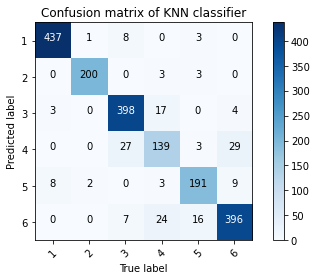

In [21]:
import itertools
cm = confusion_matrix(y_test, predictions_knn)
plot_confusion_matrix(cm, ['1', '2', '3' , '4', '5', '6'],title='Confusion matrix of KNN classifier')

Παρατηρούμε ότι η διαγώνιος έχει πολλά hits πράγμα το οποίο επιδιώκουμε καθώς το accuracy είναι ανάλογο του αριθμού των επιτυχιών της διαγωνίου. Επίσης παρατηρούμε ότι τα περισσότερα misses γίνονται στις κλάσεις 6 και 4. Αυτό πιθανότατα οφείλεται στο dataset, στο οποίο υπάρχει μεγάλη ανισορροπία μεταξύ δειγμάτων κλάσης 4 και 6.  Δεν είναι σύμπτωση ότι την μεγαλύτερη ευστοχία την έχει για τις κλάσεις 1,3,6 , αφού για αυτές υπάρχουν διπλάσια δείγματα απ'ότι οι 2,4,5.

In [22]:
#from sklearn.metrics import f1_macro
#macro_kNN =  f1_macro(y_test, predictions_knn)

In [23]:
print("Classification Report of 5-NN:\n",classification_report(y_test,predictions_knn))

Classification Report of 5-NN:
               precision    recall  f1-score   support

           1       0.98      0.97      0.97       449
           2       0.99      0.97      0.98       206
           3       0.90      0.94      0.92       422
           4       0.75      0.70      0.72       198
           5       0.88      0.90      0.89       213
           6       0.90      0.89      0.90       443

    accuracy                           0.91      1931
   macro avg       0.90      0.90      0.90      1931
weighted avg       0.91      0.91      0.91      1931



###Logistic regression


In [149]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(X_train, y_train)

predictions_LR = LR.predict(X_test)

predictions['LR'] = predictions_LR

print("Confusion Matrix of LR:\n",confusion_matrix(y_test,predictions_LR))
#predictions_LR

Confusion Matrix of LR:
 [[439   0   9   0   1   0]
 [  0 188   0   0  18   0]
 [  2   0 371  12   0  37]
 [  0   0  96  23   5  74]
 [ 16   9   1   4 148  35]
 [  0   0  67  13  17 346]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
from sklearn.metrics import f1_score

score = LR.score(X_test, y_test)                  #εναλλακτικά sc= accuracy_score(y_test,predictions)    print(sc)  

macro_LR = f1_score(y_test, predictions_LR, average = 'macro')

print(score)
print(macro_LR)

0.7845675815639565
0.7217731176646213


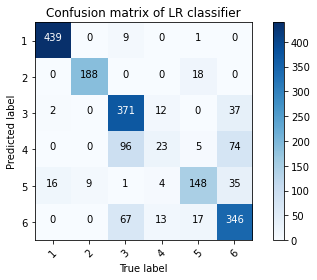

In [26]:
cm = confusion_matrix(y_test, predictions_LR)
plot_confusion_matrix(cm, ['1', '2', '3' , '4', '5', '6'],title='Confusion matrix of LR classifier')

Εδώ παρατηρούμε ότι υπάρχει σημαντική αστοχία για την κλάση 4, η οποία έχει ελάχιστο μερίδιο στα δείγματα του dataset.

###Σύγκριση ταξινομητών - plot

Έχοντας υπολογίσει αναλυτικά στα προηγούμενα βήματα τις μετρικές απόδοσης accuracy και f1_score για τους Dummy, Gaussian Naive Bayes,KNN και LR ταξινομητές, παρουσιάζουμε συγκεντρωτικά τα αποτελέσματα με γραφική απεικόνιση, ώστε να συγκρίνουμε την απόδοσή τους.

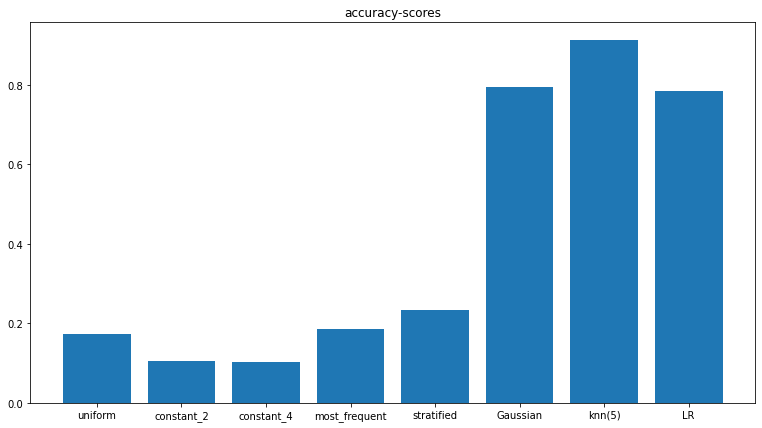

In [27]:
from sklearn.metrics import accuracy_score

accuracy_scores = {}
for i in predictions : 
  accuracy_scores[i] = accuracy_score(y_test, predictions[i])

accuracy_scores["GNB"]=accuracy_score(y_test, predictions_GNB)
accuracy_scores["knn"]=accuracy_score(y_test, predictions_knn)
accuracy_scores["LR"]=accuracy_score(y_test, predictions_LR )

acc_scoreslist=list(accuracy_scores.values())   # το κάνω list για να περάσει ως παράμετρος


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_2', 'constant_4', 'most_frequent', 'stratified', 'Gaussian', 'knn(5)', 'LR']
ax.bar(classifiers , acc_scoreslist, width=0.8)
ax.set_title('accuracy-scores')

plt.show()



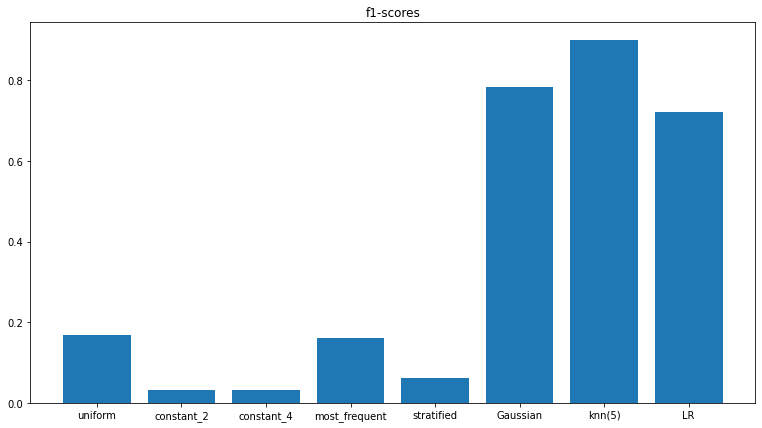

In [158]:
from sklearn.metrics import f1_score

F1_scores = {}
for i in predictions : 
   F1_scores[i] = f1_score(y_test, predictions[i], average='macro')

F1_scores["GNB"]=f1_score(y_test, predictions_GNB, average='macro' )
F1_scores["knn"]=f1_score(y_test, predictions_knn, average='macro' )
F1_scores["LR"]=f1_score(y_test, predictions_LR, average='macro' ) 


#print(F1_scores)
F1_scoreslist=list(F1_scores.values())   # το κάνω list για να περάσει ως παράμετρος


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_2', 'constant_4', 'most_frequent', 'stratified', 'Gaussian', 'knn(5)', 'LR']
ax.bar(classifiers , F1_scoreslist, width=0.8)
ax.set_title('f1-scores')

plt.show()

| uniform  |  constan_2  | constant_4   | most_frequent  | stratified  | Gaussian   | knn(5) | LR  |
|---|---|---|---|---|---|---|---|
|0.16840947305734577| 0.032132272656371856 | 0.031000469704086427| 0.16046370616807035| 0.06288515406162466| 0.7816953830745627 |0.8981946027446347| 0.7217731176646213|

Αρχικά, βλέπουμε ότι κάθε ταξινομητής έχει διαφορετικές τιμές για κάθε μετρική, αφού το data set είναι imbalanced.

Παρατηρούμε ότι την καλύτερη απόδοση έχει ο knn(5) και ως προς τις δύο μετρικές. 

Ο KNN που δεν έχει φάση εκπαίδευσης, εξετάζει όλα τα στοιχεία του train set σε κάθε βήμα, αλλά δεν είναι βελτιστοποιημένος ως προς την υπερπαράμετρο k, η οποία είναι ιδιαιτέρως σημαντική για την απόδοση του ταξινομητή.

Επίσης οι αποκλίσεις από τη μέση τιμή και την διασπορά είναι πολύ μικρές αφού τα δεδομένα είναι κανονικοποιημένα στο [-1,1] και ένας λόγος αστοχίας του Gaussian NB είναι οι μεγάλες αυτές αποκλίσεις, που εδώ δεν παρατηρούνται.

Οι dummy classifiers, σε κάθε run παρουσιάζουν διαφορετικές αποδόσεις αλλά κυμαίνονται στα ίδια επίπεδα. Από αυτούς μπορούμε να λάβουμε σοβαρά υπόψην μας είναι ο stratified και o uniform.

Τα παραπάνω ήταν out-of-the-box ταξινομήσεις , παρακάτω θα μελετήσουμε τρόπους βελτιστοποίησης:

#Βελτιστοποίηση ταξινομητών

##Μελέτη της Βελτιστοποίησης Υπερπαραμέτρων

Οι dummy και Gaussian NB δεν έχουν υπερπαραμέτρους προς βελτιστοποίηση.

Στο βήμα αυτό, βελτιστοποιούμε ως προς την υπερπαράμετρο k του KNN και αξιολογούμε την απόδοσή του συναρτήσει της παραμέτρου με τη βοήθεια δύο βοηθητικών εργαλείων: το Validation Curve και το Learning Curve. Τέλος, 
θα συγκρίνουμε τον βελτιστοποιημένο ταξινομητή με τους υπόλοιπους.

Αρχικά θα κάνουμε μια συνοπτική επισκόπηση των δύο εργαλείων Validation Curve και Learning curve.

**Validation Curve**: Αποτελεί σημαντικό εργαλείο απεικόνισης της απόδοσης ενός μοντέλου ως προς μια μετρική, συναρτήσει κάποιας υπερπαραμέτρου. Απεικονίζει 2 καμπύλες: μία για το training set score και μία για το cross-validation score.

**Learning Curve**: Η καμπύλη αυτή μας δείχνει το training και το testing score του εκτιμητή ως συνάρτηση του μεγέθους των training data. Οπτικοποιεί το πόσο βοηθά το σύστημα η προσθήκη περισσότερων training δεδομένων και το κατά πόσο ο εκτιμητής πάσχει απόό variance ή bias error.


####Βελτιστοποίηση kNN


Για τη βελτιστοποίηση του k κάνουμε grid search, με 10-fold cross validation, oρίζoντας ένα πεδίο ορισμού για το k. Για κάθε τιμή k, θα πρέπει να υπολογιστεί ο μέσος όρος του εκτιμητή σε όλα τα folds του cross-validation με βάση το  f1_macro και να επιλεχθεί το καλύτερο k.

Η συγκεκριμένη στρατηγική αναζήτησης των βέλτιστων υπερπαραμέτρων είναι η εξαντλητική αναζήτηση πλέγματος (exhaustive grid search) και είναι προφανώς πολύ ακριβή υπολογιστικά. Υπάρχουν διάφορες τεχνικές για να περιορίζεται η πολυπλοκότητα του grid search, αλλά δεν το αποφεύγουμε γενικά, γιατί οι υπερπαράμετροι είναι ορίσματα των εκτιμητών και δεν μαθαίνονται από την fit.


In [163]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8]} 

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True,  cv = 10, n_jobs = -1,scoring="f1_macro")

%time grid.fit(X_train, y_train) 

print("Best parameters regarding f1_macro is = " +str(grid.best_params_))

opt_k =grid.best_params_.get("n_neighbors")
#print(opt_k)


CPU times: user 133 ms, sys: 6.1 ms, total: 139 ms
Wall time: 2.5 s
Best parameters regarding f1_macro is = 'neighbors': 7}



To μοντέλο έχει optimal k = 7 (που είναι και περιττός)

Στη συνέχεια απεικονίζουμε γραφικά τις validation curves για το f1_macro, θεωρώντας ως υπερπαράμετρο το πλήθος των γειτόνων(k) του kNN.


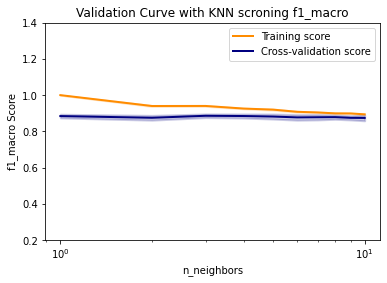

In [30]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve( KNeighborsClassifier(), X_train, y_train,  param_name="n_neighbors", param_range=param_range, scoring="f1_macro", n_jobs=-1,cv = 10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNN scroning f1_macro")
plt.xlabel("n_neighbors")
plt.ylabel("f1_macro Score")
plt.ylim(0.2, 1.4)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Από τις δύο παραπάνω καμπύλες παρατηρούμε παρόμοια συμπεριφορά του training και cross-validation score ειδικά προς το τέλος. Γενικά παρατηρούμε ότι οι δύο καμπύλες συγκλίνουν σε μεγάλο βαθμό για μεγαλυτερες τιμές της υπερπαραμέτρου k, το οποίο μας δείχνει ότι τα δεδομένα είναι fitted αρκετά καλά από τον ταξινομητή. Επίσης, δεν υπάρχουν μεγάλες διακυμάνσεις στις καμπύλες, που σημαίνει ότι το σύστημα είναι ευσταθές ως προς την παράμετρο n_neighbors. 
Ωστόσο, παρατηρούμε ότι για k = 7, η καμπύλη του validation λαμβάνει τη μέγιστη τιμή(φαίνεται οριακά πως η μπλε γραμμή αυξάνει έστω και ελάχιστα), υποδηλώνοντας ότι αυτή είναι η τιμή στην οποία το σύστημα παρουσιάζει την καλύτερη απόδοση, το οποίο συμφωνεί και με το παραπάνω αποτέλεσμα του grid search. 

Παρακάτω απεικονίζουμε γραφικά τις learning curves για το f1_macro, θεωρώντας ότι ο ταξινομητής έχει λειτουργήσει με k=5, δηλαδή με βέλτιστη υπερπαράμετρο.


In [31]:
def plot_learning_curve(train_scores, test_scores, train_sizes,title):
    plt.figure()
    plt.grid()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc="best")
    return

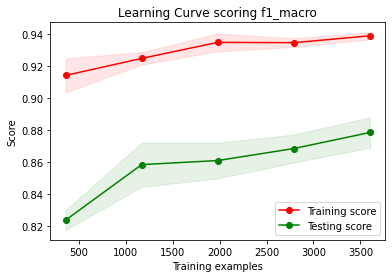

In [32]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=opt_k), X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 5), n_jobs = -1, scoring="f1_macro")
plot_learning_curve(train_scores, test_scores, train_sizes,"Learning Curve scoring f1_macro")


Από τα παραπάνω βλέπουμε ότι καμπύλη του training score είναι πάνω από το testing, που σημαίνει ότι το μοντέλο είναι underfitted. Αυτό είναι λογικό καθώς έχουμε πολύ μικρό πλήθος δεδομένων, ώστε να δημιουργήσουμε ένα ακριβές μοντέλο.

Για πληρότητα παρουσιάζουμε και τα αποτελέσματα των dummy stratified και Gaussian Naive Bayes με 10-fold-cross-validation:

####Dummy stratified

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

dc_stratified = DummyClassifier(strategy="stratified")
dc_stratified.fit(X_train, y_train)

dc_stratified_predict = cross_val_predict(dc_stratified, X_train, y_train, cv=10)

scores_most_stratified_macro = cross_val_score(dc_stratified , X_train, y_train, cv=10, scoring="f1_macro")


print("Stratified dummy classifier CV f1_macro score = %f +-%f" % (100*np.mean(scores_most_stratified_macro), 100*np.std(scores_most_stratified_macro)))

Stratified dummy classifier CV f1_macro score = 16.619722 +-2.124257


Παρατηρούμε ότι το αποτέλεσμα είναι πολύ κοντά σε αυτό της out-of-order ταξινόμησης

In [34]:

from sklearn.metrics import precision_recall_fscore_support

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_dc_stratified = list(precision_recall_fscore_support(y_train, dc_stratified_predict, average='macro'))
macro_dc_stratified .pop(3) # tou support
precision_macro_dc_stratified = macro_dc_stratified[0]
recall_macro_dc_stratified  = macro_dc_stratified[1]
f1_macro_dc_stratified = macro_dc_stratified[2]
print(macro_dc_stratified)
print()
print("All the details shown here:")
print()
print(classification_report(y_train, dc_stratified_predict, target_names= ['1' , '2' , '3' , '4' , '5', '6' ] ) )

[0.16323647046229736, 0.1632057985162616, 0.163207322408278]

All the details shown here:

              precision    recall  f1-score   support

           1       0.22      0.22      0.22      1084
           2       0.11      0.11      0.11       497
           3       0.22      0.22      0.22       936
           4       0.09      0.09      0.09       428
           5       0.12      0.11      0.11       494
           6       0.23      0.23      0.23      1065

    accuracy                           0.19      4504
   macro avg       0.16      0.16      0.16      4504
weighted avg       0.19      0.19      0.19      4504



####Gaussian Naive Bayes

In [35]:
clf = GaussianNB()
clf.fit(X_train, y_train)

#GaussianNB_predict = clf.predict(X_test)
GaussianNB_predict = cross_val_predict(clf, X_train, y_train, cv=10)

#print("Predictions for Gaussian Naive Bayes classifier:"+"\n"+" {}".format(GaussianNB_predict))
print()

GaussianNB_macro = cross_val_score(clf, X_train, y_train, cv=10, scoring="f1_macro")

print("Gaussian Naive Bayes classifier CV f1_macro score = %f +-%f" % (100*np.mean(GaussianNB_macro), 100*np.std(GaussianNB_macro)))


Gaussian Naive Bayes classifier CV f1_macro score = 77.688255 +-1.441109


In [36]:

# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macro_GNB = list(precision_recall_fscore_support(y_train, GaussianNB_predict, average='macro'))
macro_GNB.pop(3) # tou support
precision_macro_GNB = macro_GNB[0]
recall_macro_GNB = macro_GNB[1]
f1_macro_GNB = macro_GNB[2]

print(macro_GNB)
print()
print("All the details shown here:")
print()
print(classification_report(y_train, GaussianNB_predict, target_names=['1' , '2' , '3' , '4' , '5', '6' ] ) )

[0.7796772835758888, 0.7851178034981426, 0.7774024045679084]

All the details shown here:

              precision    recall  f1-score   support

           1       0.90      0.80      0.85      1084
           2       0.99      0.89      0.94       497
           3       0.89      0.89      0.89       936
           4       0.48      0.64      0.55       428
           5       0.56      0.72      0.63       494
           6       0.86      0.76      0.81      1065

    accuracy                           0.80      4504
   macro avg       0.78      0.79      0.78      4504
weighted avg       0.82      0.80      0.81      4504



###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)


macro_LR= np.mean(cross_val_score(LR, X_train, y_train, cv=5, scoring="f1_macro"))

print("LR classifier CV f1_macro score = %f +-%f" % (100*np.mean(GaussianNB_macro), 100*np.std(GaussianNB_macro)))

###Σύγκριση ταξινομητών βελτιστοποιημένων

[0.163207322408278, 0.7774024045679084, 0.8817884452760646, 0.886028428363144, 0.725495146478588]


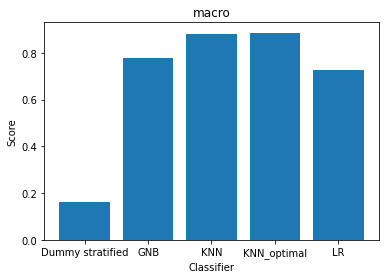

In [38]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score 
from sklearn.model_selection import cross_val_score
import numpy as np



#ξανατρέχω το kNN με την παράμετρο default k=5
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)
KNN_predict = knn.predict(X_test)


#macro_KNN = f1_score(y_test, KNN_predict, average='macro')

macro_KNN= np.mean(cross_val_score(KNN, X_train, y_train, cv=10, scoring="f1_macro"))


# τρέχω το kNN για την βέλτιστη παράμετρο k=3
KNN_opt = KNeighborsClassifier(n_neighbors= opt_k)

macro_KNN_opt = np.mean(cross_val_score(KNN_opt, X_train, y_train, cv=10, scoring="f1_macro"))


fig = plt.figure()
x = ['Dummy stratified', 'GNB', 'KNN', 'KNN_optimal' , 'LR']
y= [f1_macro_dc_stratified,f1_macro_GNB, macro_KNN, macro_KNN_opt , macro_LR]
print(y)
plt.bar( x, y, align='center', width=0.8)
plt.xticks(x,x)
plt.title('macro')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.show()

Από το παραπάνω διάγραμμα φαίνεται ότι ο βελτιωμένος kNN ( k=7) έχει καλύτερη απόδοση από τον απλό ταξινομητή kNN (k=5).

##Προεπεξεργασία

Στο βήμα αυτό θα μελετήσουμε **εποπτικά**, τα στάδια προεπεξεργασίας των δεδομένων(μείωση διαστάσεων, κανονικοποίηση χαρ/κων , εξισορρόπιση δεδομένων) και πως επηρεάζουν χονδρικά τους ταξινομητές. Έπειτα, θα χρησιμοποιήσουμε pipelines για να βρούμε **συγκεκριμένα** ποιες μέθοδοι/υπερπαράμετροι στην προεπεξεργασία θα μας δώσουν βέλτιστο αποτέλεσμα.

###Κανονικοποίηση
Σε πρώτη φάση κάνουμε κανονικοποίηση των χαρακτηριστικών ώστε να αποφύγουμε χαρακτηριστικά με πολύ μεγάλες διαφορές στις τιμές τους καθώς μπορεί να προκαλέσουν προβλήματα στην εκπαίδευση.

Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές και γίνεται με 2 τρόπους: Διαιρώντας με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] **ή** με το standard score του κάθε χαρακτηριστικού, που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα.
Εμείς θα χρησιμοποιήσουμε τον MinMax αλγόριθμο.


In [39]:
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

from sklearn import preprocessing

# το ίδιο με  min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
#print(X_train_minmax, "\n")
X_test_minmax = min_max_scaler.transform(X_test)
#print(X_test_minmax)

print(X_test_minmax.mean(axis=0))
print(X_test_minmax.std(axis=0))

[0.48574223 0.51587025 0.53122377 0.40988483 0.46644624 0.51235347
 0.51616561 0.42733092 0.46865238 0.54339771 0.4820987  0.39890747
 0.46920288 0.54648349 0.5273791  0.42005986 0.45733266 0.54747528
 0.53697325 0.40006849 0.46118791 0.54344296 0.49931889 0.39458051
 0.45886199 0.54566187 0.54721215 0.42909166 0.45544731 0.54755572
 0.51760473 0.41809215 0.45089979 0.54333737 0.51470468 0.41777657]
[0.21580561 0.20822688 0.19169346 0.15569191 0.20952281 0.20763327
 0.17587953 0.1520918  0.21985392 0.22202872 0.18690603 0.15299036
 0.21001284 0.22021658 0.19920429 0.15919679 0.21256907 0.22308405
 0.1939389  0.15305327 0.20845112 0.22185998 0.18115951 0.15407434
 0.21241994 0.22000604 0.18478501 0.14959063 0.21077848 0.22170117
 0.17513787 0.14595228 0.21072614 0.22169112 0.17575779 0.14805634]


###Μείωση διαστάσεων


#### με Variance threshold
Εφαρμόζουμε την τεχνική Variance Threshold, έτσι ώστε να μειώσουμε τις διαστάσεις των δεδομένων μας.
Σε γενικές γραμμές αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή, οπότε μπορούμε να αφαιρέσουμε αυτά τα χαρακτηριστικά. Πρέπει επίσης να πάρουμε μια μάσκα (index) των χαρακτηριστικών που επιλέγουμε, ώστε να την εφαρμόσουμε και στα δεδομένα train ώστε να έχουν τις ίδιες διαστάσεις. Αυτό δεν σπάει τον κανόνα ότι δεν χρησιμοποιούμε τα δεδομένα test γιατί μπορούμε να θεωρήσουμε ότι ο ταξινομητής απλώς αγνοεί τις εισόδους που δεν περιλαμβάνονται στη μάσκα. 

Αρχικά παρατηρούμε τις διακυμάνσεις για κάθε χαρακτηριστικό, ώστε να βρούμε το threshold το οποίο εξίζει να εφαρμόσουμε.

In [40]:
Xvar = np.var(X_train_minmax, axis=0)
print(Xvar)

[0.0466545  0.04322483 0.03654038 0.02445165 0.0433549  0.04335416
 0.03069147 0.02288173 0.0467068  0.04924419 0.03493772 0.02343696
 0.04364569 0.04815931 0.039232   0.02590565 0.04453575 0.04930419
 0.03785495 0.02362119 0.04261671 0.04941218 0.03316627 0.02416287
 0.04496984 0.04791397 0.0340315  0.0233801  0.04443837 0.04921049
 0.03101563 0.0224869  0.04359726 0.04902951 0.03087595 0.0222573 ]


In [41]:
from sklearn.feature_selection import VarianceThreshold

#print(X_train)
# αρχικοποιούμε έναν selector
selector = VarianceThreshold(threshold=0.025)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(X_train_minmax)
#print(train_reduced)
mask = selector.get_support()
#print(mask)

print(X_test.shape)

test_reduced = selector.transform(X_test_minmax)
#print(test_reduced)
print(train_reduced.shape)

(1931, 36)
(4504, 28)


Παρατηρούμε πως για threshold=0.025 απομονώνεται σημαντικό ποσοστό διαστάσεων(χαρακτηριστικών)

In [42]:
new_predictions, new_accuracies, fit_times, pred_times = DummyClassification(X_train_minmax,y_train,X_test_minmax,y_test)


for strategy in new_predictions:
    print("f1-macro average for",strategy,":",f1_score(y_test,new_predictions[strategy], average='macro'))


f1-macro average for uniform : 0.156678204009378
f1-macro average for const_2 : 0.032132272656371856
f1-macro average for const_4 : 0.031000469704086427
f1-macro average for stratif : 0.16308506324804595
f1-macro average for frequent : 0.06288515406162466


In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax, y_train)          #εκπαιδεύω με τα δεδομένα μικρότερης διάστασης
pred = knn.predict(X_test_minmax)             # κάνω classify με τα δεδομένα μικρότερης διάστασης

print("f1-macro average for:", f1_score(y_test, pred, average='macro'))

f1-macro average for: 0.894647737063064




#### με PCA
Επίσης, δοκιμάζω και την μέθοδο PCA.

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca_x_train = pca.fit_transform(X_train_minmax)
pca_x_test = pca.transform(X_test_minmax)                
#print("The pca shape is: {}".format(pca_x.shape))
print()
print("The first component contains {:.2f}% of the total information and the second one contains {:.2f}%".format( (100*pca.explained_variance_ratio_[0]),(100*pca.explained_variance_ratio_[1]) ) )
print("In total the 2 components contains {:.2f}% of the total information".format((100*pca.explained_variance_ratio_[0])+(100*pca.explained_variance_ratio_[1])) )
print()




The first component contains 53.07% of the total information and the second one contains 31.40%
In total the 2 components contains 84.47% of the total information



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_minmax)

principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

principalDf

In [46]:
dfff = pd.DataFrame(data = y_train , columns = ['class'])
finalDf = pd.concat([principalDf , dfff], axis =1 , ignore_index=True)

In [47]:
mapping = {finalDf.columns[0]:'principal component 1', finalDf.columns[1]: 'principal component 2', finalDf.columns[2]:'target'}
finalDf = finalDf.rename(columns=mapping)

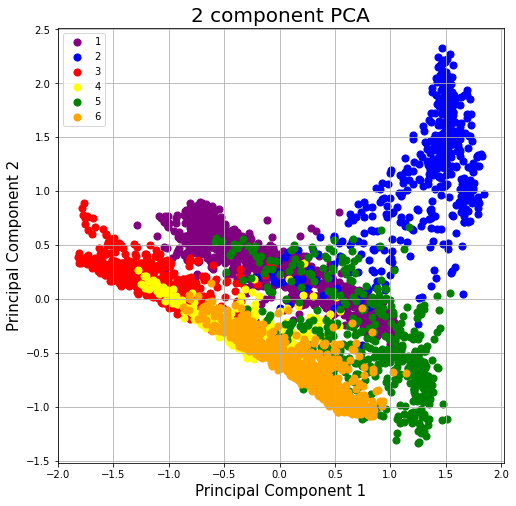

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1,2,3,4,5,6]
colors = ['purple', 'blue' ,'red','yellow','green','orange']

for x, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == x
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Μπορούμε να δούμε ότι το PCA μας κρατάει συνολικά περίπου το 85% της συνολικής πληροφορίας και η υπόλοιπη "χανεται" λόγω της μείωσης διαστατικότητας. Επίσης παρατηρούμε ότι χωρίς κανονικοποίηση των δεδομένων το ποσοστό είναι πολύ καλό.


In [49]:
new_predictions, new_accuracies, fit_times, pred_times = DummyClassification(pca_x_train, y_train, pca_x_test, y_test)

for strategy in new_predictions:
    print("f1-macro average for",strategy,":",f1_score(y_test,new_predictions[strategy], average='macro'))


f1-macro average for uniform : 0.1521790466536386
f1-macro average for const_2 : 0.032132272656371856
f1-macro average for const_4 : 0.031000469704086427
f1-macro average for stratif : 0.15509929452104446
f1-macro average for frequent : 0.06288515406162466


In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_x_train, y_train)          #εκπαιδεύω με τα δεδομένα μειώμενης διάστασης
pred = knn.predict(pca_x_test)         # κάνω classify με τα δεδομένα μειωμένης διάστασης

print("f1-macro average for:", f1_score(y_test, pred, average='macro'))

f1-macro average for: 0.8858733991440472


Παρατηρούμε λοιπόν, πως στον dummyclassifier δεν υπάρχει ουσιαστική διαφορά στην απόδοση (αναμενόμενο λόγω της φύσης του αλγορίθμου) ενώ στο knn(default=5) υπάρχει μικρή αύξηση στην απόδοση.Λογικό, αφού ο knn πρέπει να υπολογίσει την απόσταση από τους γείτονές του κάθε φορα, άρα με μειωμένη διάσταση , χρειάζονται λιγότεροι υπολογισμοί.

### Εξισορρόπηση δεδομένων

Όπως παρατηρήσαμε στην αρχή, τα δεδομένα μας είναι imbalanced. Οι μισές κλάσεις έχουν σχεδόν διπλάσια δείγματα από τις άλλες μισές.Οπότε θα χρησιμοποιήσουμε oversampling για να ισορροπήσουμε το dataset.

In [51]:
df[36].value_counts()      #δείγματα που αντιστοιχουν ανά κλάση


1    1533
6    1508
3    1358
5     707
2     703
4     626
Name: 36, dtype: int64

In [52]:
!pip install -U imbalanced-learn

In [53]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

print(X_train.shape)
print(y_train.shape)

ros = RandomOverSampler(random_state = 0)
x_train_over, y_train_over = ros.fit_resample(X_train,y_train)

from collections import Counter

freq=Counter(y_train_over)
print(freq)            #dictionary με συχνότητες

print(x_train_over.shape)
#y_train_r.value_counts() 

(4504, 36)
(4504,)
Counter({3: 1084, 1: 1084, 4: 1084, 2: 1084, 5: 1084, 6: 1084})
(6504, 36)


Βλέπουμε πως πλέον η αναλογία των κλάσεων είναι 1:1 και συνεπώς το training set είναι ισορροπημένο. Το Oversamping έγινε μόνο στο training set, αφού το test set θέλουμε να μείνει αναλοίωτο.

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

dc_stratified = DummyClassifier(strategy="stratified")
dc_strat = dc_stratified.fit(x_train_over, y_train_over)

dc_stratified_predict = cross_val_predict(dc_stratified, x_train_over , y_train_over, cv=10)

scores_most_stratified_macro = cross_val_score(dc_stratified , x_train_over, y_train_over, cv=10, scoring="f1_macro")

print(np.mean(scores_most_stratified_macro))

0.1718575180899005


In [55]:
KNN_opt = KNeighborsClassifier(n_neighbors= opt_k)

macro_KNN_opt = np.mean(cross_val_score(KNN_opt, x_train_over, y_train_over, cv=10, scoring="f1_macro"))
print(macro_KNN_opt)

0.9258778382186408


παρατηρούμε ότι βελτιώθηκε η απόδοση του knn έπειτα από την εξισορρόπηση των δεδομένων με oversampling, το οποίο ήταν αναμενόμενο.

#Συνολική μελέτη βελτιστοποίησης με την βοήθεια pipelines

Στην συνέχεια θα χρησιμοποιήσουμε pipelines για να μελετήσουμε ειδικότερα την επίδραση διαφορετικών βελτιστοποιήσεων στην απόδοση των ταξινομητών βρίσκοντας ποιες υπερπαράμετροι είναι βέλτιστες.


####Dummy Classifier

Οι Dummy Classifiers δεν έχουν υπερπαραμέτρους για να βελτιωθούν.


####kNN classifier
 

Για τον kNN αλγόριθμο:

In [76]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

#dimensionality reduction
selector = VarianceThreshold()
pca = PCA()

#oversampling , scaling
ros = RandomOverSampler()
mscaler = MinMaxScaler()
sscaler = StandardScaler()
clf = KNeighborsClassifier(n_jobs=-1)

pipe = Pipeline(steps=[('selector', selector), ('scaler', sscaler),('sampler', ros), ('pca', pca), ('kNN', clf)])

Στη συνέχεια για την θα χρησιμποιήσουμε GridSearchCV για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας.

In [77]:
from sklearn.model_selection import GridSearchCV
#Υπερπαράμετροι προς βελτιστοποίηση kNN: n_neighbors

vthreshold = [ 0.2, 0.3 , 0.4]    # προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = np.arange(1,10,1)   # η υπερπαράμετρος του pca
k = np.arange(2,50,5)              # η υπερπαράμετρος του ταξινομητή knn


In [78]:
#Δοκιμάζω όλα μαζί (βλέπουμε ότι χρειάζεται περισσότερο χρόνο)

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)

estimator_knn.fit(X_train, y_train)

new_predictions['knn'] = estimator_knn.predict(X_test)

new_accuracies['knn'] = estimator_knn.score(X_test,y_test)

print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))
print()
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()

print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


Confusion Matrix of Knn:
 [[436   0   8   1   4   0]
 [  0 201   0   2   2   1]
 [  1   0 380  36   0   5]
 [  0   0  21 161   5  11]
 [ 10   3   0   4 190   6]
 [  0   0   5  63  18 357]]


f1-macro average of Knn Classifier: 0.8837422438778009

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       449
           2       0.99      0.98      0.98       206
           3       0.92      0.90      0.91       422
           4       0.60      0.81      0.69       198
           5       0.87      0.89      0.88       213
           6       0.94      0.81      0.87       443

    accuracy                           0.89      1931
   macro avg       0.88      0.89      0.88      1931
weighted avg       0.91      0.89      0.90      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.4)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=8)),
                ('k

In [86]:
#Χωρίς το pca

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)
estimator_knn.fit(X_train,y_train)
new_predictions['knn'] = estimator_knn.predict(X_test)

new_accuracies['knn'] = estimator_knn.score(X_test,y_test)


print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print("\n")
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))

print()
print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-macro average of Knn Classifier: 0.8860725306946255



Confusion Matrix of Knn:
 [[437   0   7   0   5   0]
 [  0 199   0   5   2   0]
 [  4   0 380  34   1   3]
 [  0   0  21 166   2   9]
 [  5   2   0   4 196   6]
 [  0   0   7  65  22 349]]

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       449
           2       0.99      0.97      0.98       206
           3       0.92      0.90      0.91       422
           4       0.61      0.84      0.70       198
           5       0.86      0.92      0.89       213
           6       0.95      0.79      0.86       443

    accuracy                           0.89      1931
   macro avg       0.88      0.90      0.89      1931
weighted avg       0.91      0.89      0.90      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighb

In [87]:
#Χωρίς scaler και pca

pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator_knn.fit(X_train,y_train)
new_predictions['knn'] = estimator_knn.predict(X_test)

new_accuracies['knn'] = estimator_knn.score(X_test,y_test)

print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))
print()

print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-macro average of Knn Classifier: 0.893078638141534


Confusion Matrix of Knn:
 [[439   0   7   0   3   0]
 [  0 197   0   6   2   1]
 [  6   0 383  30   0   3]
 [  0   0  24 161   1  12]
 [  4   1   2   3 197   6]
 [  0   0  10  49  20 364]]

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       449
           2       0.99      0.96      0.98       206
           3       0.90      0.91      0.90       422
           4       0.65      0.81      0.72       198
           5       0.88      0.92      0.90       213
           6       0.94      0.82      0.88       443

    accuracy                           0.90      1931
   macro avg       0.89      0.90      0.89      1931
weighted avg       0.91      0.90      0.90      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=2))])
{'kNN__n_neighbors': 2

In [88]:
#τώρα θα το τρέξουμε χωρίς sampler

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(X_train,y_train)
new_predictions['knn'] = estimator_knn.predict(X_test)

new_accuracies['knn'] = estimator_knn.score(X_test,y_test)


print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))
print()

print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)



f1-macro average of Knn Classifier: 0.9000685094233364


Confusion Matrix of Knn:
 [[437   0   8   0   4   0]
 [  1 200   0   2   2   1]
 [  3   0 395  21   0   3]
 [  0   0  23 142   2  31]
 [  5   2   0   3 191  12]
 [  0   0   8  26  12 397]]

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       449
           2       0.99      0.97      0.98       206
           3       0.91      0.94      0.92       422
           4       0.73      0.72      0.72       198
           5       0.91      0.90      0.90       213
           6       0.89      0.90      0.90       443

    accuracy                           0.91      1931
   macro avg       0.90      0.90      0.90      1931
weighted avg       0.91      0.91      0.91      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])
{'kNN__n_neighbors': 3, 'se

Άρα καλύτερη απόδοση έχουμε για το Pipeline('selector', 'scaler', 'kNN'). Για αυτό το συνδυασμό λοιπόν θα βρω την βέλτιστη υπερπαράμετρο.

In [85]:
vthreshold = [ 0, 0.1 , 0.2]    
k = np.arange(2,10,1) 

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(X_train,y_train)

new_predictions['knn'] = estimator_knn.predict(X_test)
new_accuracies['knn'] = estimator_knn.score(X_test,y_test)

print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))
print()

print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-macro average of Knn Classifier: 0.9000685094233364


Confusion Matrix of Knn:
 [[437   0   8   0   4   0]
 [  1 200   0   2   2   1]
 [  3   0 395  21   0   3]
 [  0   0  23 142   2  31]
 [  5   2   0   3 191  12]
 [  0   0   8  26  12 397]]

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       449
           2       0.99      0.97      0.98       206
           3       0.91      0.94      0.92       422
           4       0.73      0.72      0.72       198
           5       0.91      0.90      0.90       213
           6       0.89      0.90      0.90       443

    accuracy                           0.91      1931
   macro avg       0.90      0.90      0.90      1931
weighted avg       0.91      0.91      0.91      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])
{'kNN__n_neighbors': 3, 'se

Οι παραπάνω τιμές για τις μεταβλητές μας επιλέχθηκαν ύστερα από αναζήτηση σε αρχικά μεγάλο διάστημα τιμών και στη συνέχεια περιορισμό του. Έχοντας βρει τις βέλτιστες τιμές θα προχωρήσουμε στην εκπαίδευση του ταξινομητή.

In [89]:
#Fit


pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler()), ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=3))])

start_time = time.time()
pipe.fit(X_train,y_train)           
fit_times['knn'] = time.time()-start_time

start_time = time.time()
new_predictions['knn'] = pipe.predict(X_test)
pred_times['knn'] = time.time()-start_time

new_accuracies['knn'] = pipe.score(X_test,y_test)

print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))
print("\nClassification Report of Knn:\n",classification_report(y_test,new_predictions['knn']))
print("\nFit time:\n",fit_times['knn'])
print("\nPrediction time:\n",pred_times['knn'],"\n")


f1-macro average of Knn Classifier: 0.9000685094233364


Confusion Matrix of Knn:
 [[437   0   8   0   4   0]
 [  1 200   0   2   2   1]
 [  3   0 395  21   0   3]
 [  0   0  23 142   2  31]
 [  5   2   0   3 191  12]
 [  0   0   8  26  12 397]]

Classification Report of Knn:
               precision    recall  f1-score   support

           1       0.98      0.97      0.98       449
           2       0.99      0.97      0.98       206
           3       0.91      0.94      0.92       422
           4       0.73      0.72      0.72       198
           5       0.91      0.90      0.90       213
           6       0.89      0.90      0.90       443

    accuracy                           0.91      1931
   macro avg       0.90      0.90      0.90      1931
weighted avg       0.91      0.91      0.91      1931


Fit time:
 0.009751558303833008

Prediction time:
 0.2538928985595703 



####Gaussian Bayes classifier

Για τον Gaussian Naive Bayes δεν έχουμε υπερπαραμέτρους να βελτιστοποιήσουμε, παρόλα αυτά θα χρησιμοποιήσουμε cross validation για να βρούμε τις κατάλληλες παραμετρους του που τον βελτιστοποιούν.

In [90]:
#Αρχικά τρέχουμε το Pipeline και με τις 4 μεθόδους προεπεξεργασίας
selector = VarianceThreshold() 
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB() 

vthreshold = [0, 0.1, 0.2, 0.3]  
n_components = np.arange(1,10,1) #gia pca

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)


estimator_gnb.fit(X_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(X_test)

new_accuracies['GNB'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of GNB Classifier: 0.8137601066453118


Confusion Matrix of Gaussian NB:
 [[428   2   6   2  11   0]
 [  0 200   0   1   5   0]
 [  1   2 374  35  10   0]
 [  1   1  34 103   9  50]
 [ 11   4   0   6 169  23]
 [  0   0   5  67  25 346]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           1       0.97      0.95      0.96       449
           2       0.96      0.97      0.96       206
           3       0.89      0.89      0.89       422
           4       0.48      0.52      0.50       198
           5       0.74      0.79      0.76       213
           6       0.83      0.78      0.80       443

    accuracy                           0.84      1931
   macro avg       0.81      0.82      0.81      1931
weighted avg       0.84      0.84      0.84      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('

In [97]:
#Χωρίς pca 

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros),  ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(X_train, y_train)

new_predictions['GNB'] = estimator_gnb.predict(X_test)

new_accuracies['GNB'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of GNB Classifier: 0.7792946384486593


Confusion Matrix of Gaussian NB:
 [[355   0  15   0  79   0]
 [  4 184   0   1  16   1]
 [  6   0 374  38   1   3]
 [  3   0  22 136   0  37]
 [ 22   1   1   7 162  20]
 [  1   0   3  97  25 317]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           1       0.91      0.79      0.85       449
           2       0.99      0.89      0.94       206
           3       0.90      0.89      0.89       422
           4       0.49      0.69      0.57       198
           5       0.57      0.76      0.65       213
           6       0.84      0.72      0.77       443

    accuracy                           0.79      1931
   macro avg       0.78      0.79      0.78      1931
weighted avg       0.82      0.79      0.80      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.3)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('

In [98]:
#Με pca, χωρίς scaler

pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(X_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(X_test)

new_accuracies['GNB'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of GNB Classifier: 0.827766113788235


Confusion Matrix of Gaussian NB:
 [[421   2  10   2  14   0]
 [  0 200   0   1   5   0]
 [  0   1 381  31   9   0]
 [  0   1  35 115   3  44]
 [ 12   4   0   7 175  15]
 [  0   0   4  72  21 346]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95       449
           2       0.96      0.97      0.97       206
           3       0.89      0.90      0.89       422
           4       0.50      0.58      0.54       198
           5       0.77      0.82      0.80       213
           6       0.85      0.78      0.82       443

    accuracy                           0.85      1931
   macro avg       0.82      0.83      0.83      1931
weighted avg       0.86      0.85      0.85      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=6)),
                ('gnb

In [100]:
#Χωρίς sampler

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(X_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(X_test)

new_accuracies['GNB'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of GNB Classifier: 0.7868318981424997


Confusion Matrix of Gaussian NB:
 [[430   0   8   0  11   0]
 [  0 199   0   1   6   0]
 [  6   2 385  18  10   1]
 [  1   2  35  81   5  74]
 [ 15   2   0  10 133  53]
 [  0   0   9  55  15 364]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           1       0.95      0.96      0.95       449
           2       0.97      0.97      0.97       206
           3       0.88      0.91      0.90       422
           4       0.49      0.41      0.45       198
           5       0.74      0.62      0.68       213
           6       0.74      0.82      0.78       443

    accuracy                           0.82      1931
   macro avg       0.80      0.78      0.79      1931
weighted avg       0.82      0.82      0.82      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('gnb', 

Άρα καλύτερη απόδοση έχουμε για το Pipeline('selector', 'sampler', 'pca', 'gnb'). Γιαυτό το pipeline θα βρούμε βέλτιστες υπερπαραμέτρους.

In [103]:

selector = VarianceThreshold() 
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB() 

vthreshold = [0] 
n_components = np.arange(2,10,1) #gia pca

pipe = Pipeline(steps=[('selector', selector) ,('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(X_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(X_test)

new_accuracies['GNB'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of GNB Classifier: 0.822819157830292


Confusion Matrix of Gaussian NB:
 [[418   3   9   2  17   0]
 [  0 202   0   0   4   0]
 [  0   2 383  27  10   0]
 [  0   1  37 107   9  44]
 [ 12   4   0   6 178  13]
 [  0   0   5  67  25 346]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           1       0.97      0.93      0.95       449
           2       0.95      0.98      0.97       206
           3       0.88      0.91      0.89       422
           4       0.51      0.54      0.53       198
           5       0.73      0.84      0.78       213
           6       0.86      0.78      0.82       443

    accuracy                           0.85      1931
   macro avg       0.82      0.83      0.82      1931
weighted avg       0.85      0.85      0.85      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=7)),
                ('gnb

In [107]:
#Final fit

pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold=0)), ('sampler', RandomOverSampler()), ('pca', PCA(n_components=7)), ('gnb', GaussianNB())])


start_time = time.time()
pipe.fit(X_train,y_train)
fit_times['GNB'] = time.time()-start_time

start_time = time.time()
new_predictions['GNB'] = pipe.predict(X_test)
pred_times['GNB'] = time.time()-start_time

new_accuracies['GNB'] = pipe.score(X_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of GNB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of GNB:\n",classification_report(y_test,new_predictions['GNB']))
print("\nFit time:\n",fit_times['GNB'])
print("\nPrediction time:\n",pred_times['GNB'],"\n")




f1-micro average of GNB Classifier: 0.8234040094451903


Confusion Matrix of GNB:
 [[416   3   9   2  17   2]
 [  0 202   0   0   4   0]
 [  0   2 381  30   9   0]
 [  0   1  37 109   9  42]
 [  9   4   0   9 176  15]
 [  0   0   4  66  23 350]]

Classification Report of GNB:
               precision    recall  f1-score   support

           1       0.98      0.93      0.95       449
           2       0.95      0.98      0.97       206
           3       0.88      0.90      0.89       422
           4       0.50      0.55      0.53       198
           5       0.74      0.83      0.78       213
           6       0.86      0.79      0.82       443

    accuracy                           0.85      1931
   macro avg       0.82      0.83      0.82      1931
weighted avg       0.85      0.85      0.85      1931


Fit time:
 0.07073760032653809

Prediction time:
 0.008940458297729492 



####LR classifier

In [116]:
#Αρχικά τρέχουμε το Pipeline και με τις 4 μεθόδους προεπεξεργασίας
selector = VarianceThreshold() 
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression() 

vthreshold = [0, 0.01, 0.02, 0.03]  
n_components = np.arange(1,10,1) #gia pca

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('LR', clf)])
estimator_LR = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)


estimator_LR.fit(X_train,y_train)

new_predictions['LR'] = estimator_LR.predict(X_test)

new_accuracies['LR'] = estimator_LR.score(X_test,y_test)

print("\nf1-macro average of LR Classifier:",f1_score(y_test,new_predictions['LR'], average='macro'))
print()
print("\nConfusion Matrix of LR:\n",confusion_matrix(y_test,new_predictions['LR']))
print("\nClassification Report of LR:\n",classification_report(y_test,new_predictions['LR']))


print(estimator_LR.best_estimator_)
print(estimator_LR.best_params_)


f1-macro average of LR Classifier: 0.8202213857896195


Confusion Matrix of LR:
 [[423   0  12   2  12   0]
 [  0 195   0   0  11   0]
 [  2   1 369  50   0   0]
 [  1   0  19 134   7  37]
 [ 12   2   2   9 166  22]
 [  1   0   4  89  23 326]]

Classification Report of LR:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95       449
           2       0.98      0.95      0.97       206
           3       0.91      0.87      0.89       422
           4       0.47      0.68      0.56       198
           5       0.76      0.78      0.77       213
           6       0.85      0.74      0.79       443

    accuracy                           0.84      1931
   macro avg       0.82      0.83      0.82      1931
weighted avg       0.85      0.84      0.84      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.03)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_compon

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [117]:
#Χωρίς pca 

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros),  ('LR', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_macro', n_jobs=-1)

estimator_gnb.fit(X_train,y_train)

new_predictions['LR'] = estimator_gnb.predict(X_test)

new_accuracies['LR'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['LR'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['LR']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['LR']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of GNB Classifier: 0.8389618386920651


Confusion Matrix of Gaussian NB:
 [[427   0  12   2   8   0]
 [  0 195   0   1  10   0]
 [  2   0 361  59   0   0]
 [  1   0  18 141   4  34]
 [  6   3   1   3 179  21]
 [  1   0   3  75  23 341]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           1       0.98      0.95      0.96       449
           2       0.98      0.95      0.97       206
           3       0.91      0.86      0.88       422
           4       0.50      0.71      0.59       198
           5       0.80      0.84      0.82       213
           6       0.86      0.77      0.81       443

    accuracy                           0.85      1931
   macro avg       0.84      0.85      0.84      1931
weighted avg       0.87      0.85      0.86      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.03)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                (

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [118]:
#Με pca, χωρίς scaler

pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('LR', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)


estimator_gnb.fit(X_train,y_train)

new_predictions['LR'] = estimator_gnb.predict(X_test)

new_accuracies['LR'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['LR'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['LR']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['LR']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of GNB Classifier: 0.8180386607686566


Confusion Matrix of Gaussian NB:
 [[423   0  14   1  11   0]
 [  0 195   0   1  10   0]
 [  2   1 367  52   0   0]
 [  2   0  22 131   4  39]
 [ 10   2   9   6 161  25]
 [  1   0   7  80  22 333]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95       449
           2       0.98      0.95      0.97       206
           3       0.88      0.87      0.87       422
           4       0.48      0.66      0.56       198
           5       0.77      0.76      0.76       213
           6       0.84      0.75      0.79       443

    accuracy                           0.83      1931
   macro avg       0.82      0.82      0.82      1931
weighted avg       0.85      0.83      0.84      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=8)),
                ('LR

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [119]:
#Χωρίς sampler

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('pca', pca), ('LR', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)


estimator_gnb.fit(X_train,y_train)

new_predictions['LR'] = estimator_gnb.predict(X_test)

new_accuracies['LR'] = estimator_gnb.score(X_test,y_test)

print("\nf1-macro average of LR Classifier:",f1_score(y_test,new_predictions['LR'], average='macro'))
print()
print("\nConfusion Matrix of LR:\n",confusion_matrix(y_test,new_predictions['LR']))
print("\nClassification Report of LR:\n",classification_report(y_test,new_predictions['LR']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of LR Classifier: 0.7917903996573944


Confusion Matrix of LR:
 [[426   0  13   1   9   0]
 [  0 195   0   0  11   0]
 [  3   0 397  17   0   5]
 [  2   0  40  56   5  95]
 [ 15   2   2   3 156  35]
 [  1   0   7  27  19 389]]

Classification Report of LR:
               precision    recall  f1-score   support

           1       0.95      0.95      0.95       449
           2       0.99      0.95      0.97       206
           3       0.86      0.94      0.90       422
           4       0.54      0.28      0.37       198
           5       0.78      0.73      0.76       213
           6       0.74      0.88      0.80       443

    accuracy                           0.84      1931
   macro avg       0.81      0.79      0.79      1931
weighted avg       0.83      0.84      0.83      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.01)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('LR', LogisticRegressio

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Άρα καλύτερη απόδοση έχουμε για το Pipeline('selector','scaler', 'sampler', 'LR'). Γιαυτό το pipeline θα βρούμε βέλτιστες υπερπαραμέτρους.

In [123]:
#για τις βελτιστες υπερπαραμετρους
selector = VarianceThreshold() 
scaler = StandardScaler()
ros = RandomOverSampler()
clf = LogisticRegression()

vthreshold = [0 , 0.01 , 0.02, 0.03 , 0.04] 

pipe = Pipeline(steps=[('selector', selector), ('scaler', sscaler),('sampler', ros), ('pca', pca), ('LR', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_macro', n_jobs=-1)


estimator_gnb.fit(X_train,y_train)

new_predictions['LR'] = estimator_gnb.predict(X_test)

new_accuracies['LR'] = estimator_gnb.score(X_test,y_test)


print("\nf1-macro average of LR Classifier:",f1_score(y_test,new_predictions['LR'], average='macro'))
print()
print("\nConfusion Matrix of LR :\n",confusion_matrix(y_test,new_predictions['LR']))
print("\nClassification Report of LR :\n",classification_report(y_test,new_predictions['LR']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)


f1-macro average of LR Classifier: 0.8390994577058312


Confusion Matrix of LR :
 [[428   1  13   1   6   0]
 [  0 193   0   1  12   0]
 [  2   0 361  59   0   0]
 [  1   0  20 144   3  30]
 [  8   3   1   3 177  21]
 [  1   0   4  72  24 342]]

Classification Report of LR :
               precision    recall  f1-score   support

           1       0.97      0.95      0.96       449
           2       0.98      0.94      0.96       206
           3       0.90      0.86      0.88       422
           4       0.51      0.73      0.60       198
           5       0.80      0.83      0.81       213
           6       0.87      0.77      0.82       443

    accuracy                           0.85      1931
   macro avg       0.84      0.85      0.84      1931
weighted avg       0.87      0.85      0.86      1931

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.01)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA()), ('

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [124]:
#Final fit

pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold=0.01)), ('scaler', StandardScaler()), ('sampler', RandomOverSampler()), ('LR',LogisticRegression())])

start_time = time.time()
pipe.fit(X_train,y_train)
fit_times['LR'] = time.time()-start_time

start_time = time.time()

new_predictions['LR'] = pipe.predict(X_test)
pred_times['LR'] = time.time()-start_time

new_accuracies['LR'] = pipe.score(X_test,y_test)

print("\nf1-macro average of LR Classifier:",f1_score(y_test,new_predictions['LR'], average='macro'))
print()
print("\nConfusion Matrix of LR:\n",confusion_matrix(y_test,new_predictions['LR']))
print("\nClassification Report of LR:\n",classification_report(y_test,new_predictions['LR']))
print("\nFit time:\n",fit_times['LR'])
print("\nPrediction time:\n",pred_times['LR'],"\n")




f1-macro average of LR Classifier: 0.8398319180972277


Confusion Matrix of LR:
 [[425   0  14   1   9   0]
 [  0 194   0   0  12   0]
 [  2   0 363  57   0   0]
 [  1   0  17 144   5  31]
 [  6   4   1   3 178  21]
 [  0   0   3  78  20 342]]

Classification Report of LR:
               precision    recall  f1-score   support

           1       0.98      0.95      0.96       449
           2       0.98      0.94      0.96       206
           3       0.91      0.86      0.89       422
           4       0.51      0.73      0.60       198
           5       0.79      0.84      0.81       213
           6       0.87      0.77      0.82       443

    accuracy                           0.85      1931
   macro avg       0.84      0.85      0.84      1931
weighted avg       0.87      0.85      0.86      1931


Fit time:
 0.5827927589416504

Prediction time:
 0.002846240997314453 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##Πίνακας σύγκρισης απόδοσης πριν και μετά την βελτιστοποίηση των ταξινομητών

In [156]:
new_predictions.keys()

dict_keys(['uniform', 'const_2', 'const_4', 'stratif', 'frequent', 'knn', 'GNB', 'LR'])

In [153]:
f1_default_macros = []
for clf in new_predictions: 
    f1_default_macros.append(f1_score(y_test,predictions[clf],average='macro'))

f1_default_macros   

[0.16840947305734577,
 0.032132272656371856,
 0.031000469704086427,
 0.16046370616807035,
 0.06288515406162466,
 0.8981946027446347,
 0.7816953830745627,
 0.7217731176646213]

In [154]:
f1_opt_macros = []
for clf in new_predictions: 
    f1_opt_macros.append(f1_score(y_test,new_predictions[clf],average='macro'))

f1_opt_macros

[0.1521790466536386,
 0.032132272656371856,
 0.031000469704086427,
 0.15509929452104446,
 0.06288515406162466,
 0.9000685094233364,
 0.8234040094451903,
 0.8398319180972277]

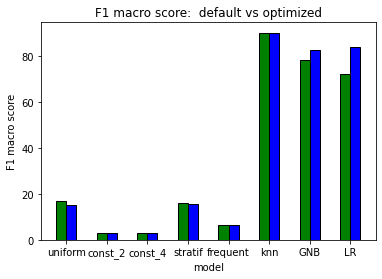

In [157]:
#plot
n=8
r = np.arange(n)
width = 0.25
  
f1_default = f1_default_macros
f1_optimized_values = f1_opt_macros

percent_f1_default = [element * 100 for element in f1_default]  

percent_f1_optimized_values = [element * 100 for element in f1_optimized_values]

plt.bar(r, percent_f1_default, color = 'g', width = width, edgecolor = 'black')
plt.bar(r + width, percent_f1_optimized_values , color = 'b', width = width, edgecolor = 'black')
  
plt.xlabel("model")
plt.ylabel("F1 macro score")
plt.title("F1 macro score:  default vs optimized")
  
plt.xticks(r + width/2, ['uniform', 'const_2', 'const_4', 'stratif', 'frequent', 'knn', 'GNB', 'LR'])
  
plt.show()

|    | uniform | const_2 | const_4 | stratif | frequent | knn |  GNB |  LR  |
|----|---------|---------|---------|---------|----------|-----|------|------|
|before|0.168| 0.0321|0.031|0.160|0.0629|0.898|0.781|0.721|
|after|0.152|0.0321|0.031|0.155|0.0628|0.900 | 0.823|0.84 |



Γενικά συμπεράσματα:
- βέλτιστος ταξινομητής είναι ο knn για τιμές του k γύρω από το 5.
- παρατηρούμε μεγάλη αύξηση απόδοσης στους ταξινομητές GNB, LR μετά την βελτιστοποίηση, ενώ ο knn κυμαίνεται στα ίδια επίπεδα.
- βελτιστοποίηση των dummy classifiers σε πολλές περιπτώσεις μειώνει την απόδοση, αφού από την φύση τους αυτοί οι ταξινομητές είναι αδύναμοι
